<a href="https://colab.research.google.com/github/youssefhedhili/miscellaneous/blob/master/3_Keras_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Neural Networks with Python

**Importing Libraries and modules**

We will be using a library called Keras. It has all the functionality needed to construct, train and evaluate machine learning models. We will construct a feed-forward CNN, it is a basic type of neural network that forwards the information layer after layer.

We will start importing the Sequential model from Keras. It is just a sequence of neural network layers, and is perfect for constructing such a network.

In [1]:
# Keras is already installed on Colab, so we only need to import it
from keras.models import Sequential

Using TensorFlow backend.


Next, let's import the "core" layers from Keras. These are the layers that are used in almost any neural network.

In [0]:
from keras.layers import Dense, Dropout, Activation, Flatten

Then, we'll import the CNN layers from Keras. These are the convolutional layers that will help us efficiently train on image data.

In [0]:
from keras.layers import Convolution2D, MaxPooling2D

Finally, we'll import some utilities. This will help us transform our data later.

In [0]:
from keras.utils import np_utils

**Load image data from MNIST**

MNIST is a dataset that consist on 60000 images of hand-written digits in a size of 28x28 pixels.

It is a great dataset for getting started with deep learning and computer vision. It's a big enough challenge to neural networks, but it's manageable on a single computer.


We will importing it from the Keras package, and separating it into 2 sets: train set and test set.
For each set, we will have a set of images, and a set of the corresponding labels of the images.

In [3]:
from keras.datasets import mnist
 
# Load MNIST data into train and test sets
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


Let's look at the shape of the images train dataset

In [0]:
print(train_images.shape)

(60000, 28, 28)


Great, so it appears that we have 60,000 samples in our training set, and the images are 28 pixels x 28 pixels each. We can confirm this by plotting the first sample in matplotlib.

Expected Label:  5


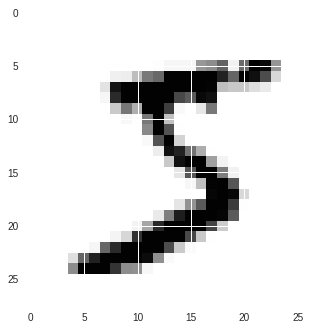

In [6]:
from matplotlib import pyplot as plt
plt.imshow(train_images[0])
print('Expected Label: ', train_labels[0])

In [0]:
from keras import backend as K
K.set_image_dim_ordering('th')
# input image dimensions
img_rows, img_cols = 28, 28


if K.image_data_format() == 'channels_first':
    train_images = train_images.reshape(train_images.shape[0], 1, img_rows, img_cols)
    test_images = test_images.reshape(test_images.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    train_images = train_images.reshape(train_images.shape[0], img_rows, img_cols, 1)
    test_images = test_images.reshape(test_images.shape[0], img_rows, img_cols, 1)

In [0]:
#When using the Theano backend, you must explicitly declare a dimension for the depth of the input image. For example, a full-color image with all 3 RGB channels will have a depth of 3.
#Our MNIST images only have a depth of 1, but we must explicitly declare that.
#In other words, we want to transform our dataset from having shape (n, width, height) to (n, depth, width, height).
#Here's how we can do that easily:

#Convert data type and normalize values

train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255

print(train_images.shape)




(60000, 1, 28, 28)


**Preprocess class labels for Keras**

Now, to have a proper training we need the labels to be an zero array, with a one on the expected label:

For example, for a label expected of 5:
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0 ]

Let's take a look at the shape of our class label data.


In [0]:
print(train_labels.shape)

(60000,)


We should have 10 different classes, one for each digit, but we have only a 1-dimensional array.

Let's take a look at the labels for the first 10 images.

In [0]:
print(train_labels[:10])

[5 0 4 1 9 2 1 3 1 4]


So the problem is that the labels are not split into 10 class labels, but represented as a single array with the class values.

We will fix it converting the 1-dimensional arrays to 10-dimensional class matrices

In [0]:
from keras import backend as K
K.set_image_dim_ordering('th')

train_labels = np_utils.to_categorical(train_labels, 10)
test_labels = np_utils.to_categorical(test_labels, 10)

Now let's take a look

In [14]:
print(train_labels.shape)

print(train_labels[:10])

(60000, 10)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


**Define model architecture**

Now we are ready to define the architecture of the model.

First we will declare a sequential model format.

In [0]:
model = Sequential()

Next, we declare the input layer

In [0]:
#CNN input layer

model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(1,28,28)))

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(1, 28, 28...)`
  


The input shape parameter should be the shape of 1 sample. In this case, it's the same (1, 28, 28) that corresponds to  the (depth, width, height) of each image.

The first 3 parameters correspond to the number of convolution filters to use, the number of rows in each convolution kernel, and the number of columns in each convolution kernel, respectively. So we have 32 convolution filters, each as a 3x3 matrix.

We can confirm this by printing the shape of the current model output.

In [0]:
print(model.output_shape)

(None, 32, 26, 26)


Next, we can simply add more layers to our model like we're building legos

In [0]:
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  


We won't go into the theory too much, but it's important to highlight the Dropout layer we just added. This is a method for regularizing our model in order to prevent overfitting.

MaxPooling2D is a way to reduce the number of parameters in our model by sliding a 2x2 pooling filter across the previous layer and taking the max of the 4 values in the 2x2 filter.

So far, for model parameters, we've added two Convolution layers. To complete our model architecture, let's add a fully connected layer and then the output layer.


In [0]:
#Fully connected Dense layers

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

For Dense layers, the first parameter is the output size of the layer. Keras automatically handles the connections between layers.

Note that the final layer has an output size of 10, corresponding to the 10 classes of digits.

Also note that the weights from the Convolution layers must be flattened (made 1-dimensional) before passing them to the fully connected Dense layer.

Finally the architecture of the model will be:



In [0]:
#Model architecture
# model = Sequential()
 
# model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(1,28,28)))
# model.add(Convolution2D(32, 3, 3, activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.25))
 
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(10, activation='softmax'))

**Compile the model**

When we compile the model, we declare the loss function and the optimizer (SGD, Adam, etc.)

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

**Fit model on training data**

To fit the model, all we have to do is declare the batch size and number of epochs to train for, then pass in our training data.

In [0]:
#Fit Keras model
model.fit(train_images, train_labels, 
          batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/10
60000/60000 [==============================] - 18s 301us/step - loss: 0.2048 - acc: 0.9368
Epoch 2/10
60000/60000 [==============================] - 17s 280us/step - loss: 0.0865 - acc: 0.9740
Epoch 3/10
60000/60000 [==============================] - 17s 280us/step - loss: 0.0659 - acc: 0.9805
Epoch 4/10
60000/60000 [==============================] - 17s 280us/step - loss: 0.0557 - acc: 0.9834
Epoch 5/10
60000/60000 [==============================] - 17s 280us/step - loss: 0.0452 - acc: 0.9860
Epoch 6/10
60000/60000 [==============================] - 17s 280us/step - loss: 0.0425 - acc: 0.9868
Epoch 7/10
60000/60000 [==============================] - 17s 280us/step - loss: 0.0359 - acc: 0.9884
Epoch 8/10
60000/60000 [==============================] - 17s 279us/step - loss: 0.0331 - acc: 0.9893
Epoch 9/10
60000/60000 [==============================] - 17s 279us/step - loss: 0.0315 - acc: 0.9902
Epoch 10/10
60000/60000 [==============================] - 17s 280us/step - loss: 

**Evaluate model on test data**

Finally, we can evaluate our model on the test data.

In [0]:
score = model.evaluate(test_images, test_labels, verbose=0)
print(score)

[0.027494018173711266, 0.9921]
